### Intro ###
This notebook hopes to illustrate an end to end transformation of the college fight songs csv file into a visualization through cleaning and formatting, exploratory data analysis, fitting and testing with some classification algorithms and a final set of visualizations. My goal is try to learn something new from the data. Some things I will try to do is be able to classify the songs by what conference they belong in using a SVM, examine the relationship between the number of tropes (as defined by FiveThirtyEight) between the songs, and analyze some of the different quantitative and categorical features to see what similarities can be found between publication year and conference <br>-----------<br> Let's start with some imports

In [1]:
import pandas as pd
import numpy as np

Read in the dataset and take a peek at the first 5 rows

In [2]:
data = pd.read_csv("fight-songs.csv")
data.head()

school   conference          song_name  \
0    Notre Dame  Independent      Victory March   
1        Baylor       Big 12          Old Fight   
2    Iowa State       Big 12  Iowa State Fights   
3        Kansas       Big 12      I'm a Jayhawk   
4  Kansas State       Big 12    Wildcat Victory   

                                             writers  year student_writer  \
0                   Michael J. Shea and John F. Shea  1908             No   
1                         Dick Baker and Frank Boggs  1947            Yes   
2  Jack Barker, Manly Rice, Paul Gnam, Rosalind K...  1930            Yes   
3                              George "Dumpy" Bowles  1912            Yes   
4                                  Harry E. Erickson  1927            Yes   

  official_song contest  bpm  sec_duration  ... win_won  victory_win_won  rah  \
0           Yes      No  152            64  ...     Yes              Yes  Yes   
1           Yes      No   76            99  ...     Yes              Yes   No   
2           Yes      No  155            55  ...      No               No  Yes   
3           Yes      No  137            62  ...      No               No   No   
4           Yes      No   80            67  ...      No              Yes   No   

  nonsense colors  men opponents spelling trope_count              spotify_id  
0       No    Yes  Yes        No       No           6  15a3ShKX3XWKzq0lSS48yr  
1       No    Yes   No        No      Yes           5  2ZsaI0Cu4nz8DHfBkPt0Dl  
2       No     No  Yes        No      Yes           4  3yyfoOXZQCtR6pfRJqu9pl  
3      Yes     No  Yes       Yes       No           3  0JzbjZgcjugS0dmPjF9R89  
4       No    Yes   No        No       No           3  4xxDK4g1OHhZ44sTFy8Ktm  

[5 rows x 23 columns]

We can drop the spotify ID column since that has no bearing on our analysis. Same with the writer names.

In [3]:
data = data.drop(["spotify_id", "writers"], axis = 1)
data

school   conference  \
0             Notre Dame  Independent   
1                 Baylor       Big 12   
2             Iowa State       Big 12   
3                 Kansas       Big 12   
4           Kansas State       Big 12   
5               Oklahoma       Big 12   
6         Oklahoma State       Big 12   
7                  Texas       Big 12   
8                    TCU       Big 12   
9             Texas Tech       Big 12   
10         West Virginia       Big 12   
11              Illinois      Big Ten   
12               Indiana      Big Ten   
13                  Iowa      Big Ten   
14              Maryland      Big Ten   
15              Michigan      Big Ten   
16        Michigan State      Big Ten   
17             Minnesota      Big Ten   
18              Nebraska      Big Ten   
19          Northwestern      Big Ten   
20            Ohio State      Big Ten   
21            Penn State      Big Ten   
22                Purdue      Big Ten   
23               Rutgers      Big Ten   
24             Wisconsin      Big Ten   
25               Arizona       Pac-12   
26         Arizona State       Pac-12   
27            California       Pac-12   
28              Colorado       Pac-12   
29                Oregon       Pac-12   
..                   ...          ...   
35            Washington       Pac-12   
36      Washington State       Pac-12   
37               Alabama          SEC   
38              Arkansas          SEC   
39                Auburn          SEC   
40               Florida          SEC   
41               Georgia          SEC   
42              Kentucky          SEC   
43                   LSU          SEC   
44           Mississippi          SEC   
45     Mississippi State          SEC   
46              Missouri          SEC   
47        South Carolina          SEC   
48             Tennessee          SEC   
49             Texas A&M          SEC   
50            Vanderbilt          SEC   
51        Boston College          ACC   
52               Clemson          ACC   
53                  Duke          ACC   
54         Florida State          ACC   
55          Georgia Tech          ACC   
56            Louisville          ACC   
57                 Miami          ACC   
58        North Carolina          ACC   
59  North Carolina State          ACC   
60                  Pitt          ACC   
61              Syracuse          ACC   
62              Virginia          ACC   
63         Virginia Tech          ACC   
64           Wake Forest          ACC   

                                            song_name     year student_writer  \
0                                       Victory March     1908             No   
1                                           Old Fight     1947            Yes   
2                                   Iowa State Fights     1930            Yes   
3                                       I'm a Jayhawk     1912            Yes   
4                                     Wildcat Victory     1927            Yes   
5                                       Boomer Sooner     1905            Yes   
6                                    Ride 'Em Cowboys     1934             No   
7                                         Texas Fight     1923             No   
8                                      TCU Fight Song     1928             No   
9                               Fight, Raiders, Fight     1936            Yes   
10                                 Hail West Virginia     1915            Yes   
11                                      Oskee-Wow-Wow     1910            Yes   
12                               Indiana, Our Indiana     1912            Yes   
13                                    Iowa Fight Song     1950             No   
14                                Maryland Fight Song     1939            Yes   
15                                        The Victors     1898            Yes   
16                                    Victory for MSU     1915            Yes   
17               

Let's also create separate data frames with categorical and quantitative columns if we want to look at them separately later

In [4]:
quants = data.filter(["bpm", "sec_duration", "number_fights", "trope_counts"])
categoricals = data.filter(["school", "conference", "song_name", "student_writer", "official_song", "fight", "victory", "win_won", "victory_win_won", "rah", "nonsense", "colors", "men", "opponents", "spelling"])
categoricals

school   conference  \
0             Notre Dame  Independent   
1                 Baylor       Big 12   
2             Iowa State       Big 12   
3                 Kansas       Big 12   
4           Kansas State       Big 12   
5               Oklahoma       Big 12   
6         Oklahoma State       Big 12   
7                  Texas       Big 12   
8                    TCU       Big 12   
9             Texas Tech       Big 12   
10         West Virginia       Big 12   
11              Illinois      Big Ten   
12               Indiana      Big Ten   
13                  Iowa      Big Ten   
14              Maryland      Big Ten   
15              Michigan      Big Ten   
16        Michigan State      Big Ten   
17             Minnesota      Big Ten   
18              Nebraska      Big Ten   
19          Northwestern      Big Ten   
20            Ohio State      Big Ten   
21            Penn State      Big Ten   
22                Purdue      Big Ten   
23               Rutgers      Big Ten   
24             Wisconsin      Big Ten   
25               Arizona       Pac-12   
26         Arizona State       Pac-12   
27            California       Pac-12   
28              Colorado       Pac-12   
29                Oregon       Pac-12   
..                   ...          ...   
35            Washington       Pac-12   
36      Washington State       Pac-12   
37               Alabama          SEC   
38              Arkansas          SEC   
39                Auburn          SEC   
40               Florida          SEC   
41               Georgia          SEC   
42              Kentucky          SEC   
43                   LSU          SEC   
44           Mississippi          SEC   
45     Mississippi State          SEC   
46              Missouri          SEC   
47        South Carolina          SEC   
48             Tennessee          SEC   
49             Texas A&M          SEC   
50            Vanderbilt          SEC   
51        Boston College          ACC   
52               Clemson          ACC   
53                  Duke          ACC   
54         Florida State          ACC   
55          Georgia Tech          ACC   
56            Louisville          ACC   
57                 Miami          ACC   
58        North Carolina          ACC   
59  North Carolina State          ACC   
60                  Pitt          ACC   
61              Syracuse          ACC   
62              Virginia          ACC   
63         Virginia Tech          ACC   
64           Wake Forest          ACC   

                                            song_name student_writer  \
0                                       Victory March             No   
1                                           Old Fight            Yes   
2                                   Iowa State Fights            Yes   
3                                       I'm a Jayhawk            Yes   
4                                     Wildcat Victory            Yes   
5                                       Boomer Sooner            Yes   
6                                    Ride 'Em Cowboys             No   
7                                         Texas Fight             No   
8                                      TCU Fight Song             No   
9                               Fight, Raiders, Fight            Yes   
10                                 Hail West Virginia            Yes   
11                                      Oskee-Wow-Wow            Yes   
12                               Indiana, Our Indiana            Yes   
13                                    Iowa Fight Song             No   
14                                Maryland Fight Song            Yes   
15                                        The Victors            Yes   
16                                    Victory for MSU            Yes   
17                               The Minnesota Rouser             No   
18                               Dear Old Nebraska U.            Yes   
19                                 

In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 21 columns):
school             65 non-null object
conference         65 non-null object
song_name          65 non-null object
year               65 non-null object
student_writer     65 non-null object
official_song      65 non-null object
contest            65 non-null object
bpm                65 non-null int64
sec_duration       65 non-null int64
fight              65 non-null object
number_fights      65 non-null int64
victory            65 non-null object
win_won            65 non-null object
victory_win_won    65 non-null object
rah                65 non-null object
nonsense           65 non-null object
colors             65 non-null object
men                65 non-null object
opponents          65 non-null object
spelling           65 non-null object
trope_count        65 non-null int64
dtypes: int64(4), object(17)
memory usage: 10.7+ KB


bpm  sec_duration  number_fights  trope_count
count   65.000000     65.000000      65.000000    65.000000
mean   128.800000     71.907692       2.846154     3.615385
std     33.152677     25.056014       3.231828     1.674182
min     65.000000     27.000000       0.000000     0.000000
25%     90.000000     58.000000       0.000000     3.000000
50%    140.000000     67.000000       2.000000     4.000000
75%    151.000000     85.000000       5.000000     5.000000
max    180.000000    172.000000      17.000000     8.000000

Given that we have a clean data set and some summary statistics, let's do some EDA by plotting some charts using the plotly and chart studio libraries to see what we might learn!
### EDA ###

In [6]:
import chart_studio
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [7]:
trace = go.Bar(x = data.school, y = data.trope_count)
layout = go.Layout(title = "Trope Count by School", 
                   xaxis = dict(title = "School", 
                   showticklabels = False,),
                   yaxis = dict(title = "Number of Tropes"))
fig = go.Figure(data=trace, layout = layout)
fig.show()

Here's a bar graph but it really doesn't tell us all that much. Let's try to break it up by conference using colors

In [8]:
from plotly.subplots import make_subplots
layout = go.Layout(title = "Trope Count by School", 
                   xaxis = dict(title = "School", 
                                showticklabels = False,
                                categoryorder = "total descending"),
                   yaxis = dict(title = "Number of Tropes",
                                ))
fig = go.Figure(layout = layout)

sec_schools = data[data["conference"] == "SEC"]
sec = go.Bar(x = sec_schools.school, y = sec_schools.trope_count, text = "", textposition = "auto", marker_color = "indianred", name = "SEC")
fig.add_trace(sec)

acc_schools = data[data["conference"] == "ACC"]
acc = go.Bar(x = acc_schools.school, y = acc_schools.trope_count, text = "", textposition = "auto", marker_color = "royalblue", name = "ACC")
fig.add_trace(acc)

b10_schools = data[data["conference"] == "Big Ten"]
b10 = go.Bar(x = b10_schools.school, y = b10_schools.trope_count, text = "", textposition = "auto", marker_color = "green", name = "Big 10")
fig.add_trace(b10)

b12_schools = data[data["conference"] == "Big 12"]
b12 = go.Bar(x = b12_schools.school, y = b12_schools.trope_count, text = "", textposition = "auto", marker_color = "gold", name = "Big 12")
fig.add_trace(b12)

pac12_schools = data[data["conference"] == "Pac-12"]
pac12 = go.Bar(x = pac12_schools.school, y = pac12_schools.trope_count, text = "", textposition = "auto", marker_color = "orange", name = "Pac 12")
fig.add_trace(pac12)

fig.show()

It looks like there's a pretty fair distribution of tropes among all the conferences. Rutgers stands out with 8 and there are 5 Pac 12 schools with 5 tropes each. Next I will use pie charts to show the breakdown by conference

In [9]:
acc_schools = data[data["conference"] == "ACC"]

zero_trope = 0
one_trope = 0
two_trope = 0
three_trope = 0
four_trope = 0
five_trope = 0
six_trope = 0
seven_trope = 0
eight_trope = 0

for index, row in acc_schools.iterrows():
    if row["trope_count"] == 0:
        zero_trope += 1
    if row["trope_count"] == 1:
        one_trope += 1
    if row["trope_count"] == 2:
        two_trope += 1
    if row["trope_count"] == 3:
        three_trope += 1
    if row["trope_count"] == 4:
        four_trope += 1
    if row["trope_count"] == 5:
        five_trope += 1
    if row["trope_count"] == 6:
        six_trope += 1
    if row["trope_count"] == 7:
        seven_trope += 1
    if row["trope_count"] == 8:
        eight_trope += 1
        
acc_data = [zero_trope,one_trope, two_trope, three_trope, four_trope, five_trope, six_trope, seven_trope, eight_trope] 


sec_schools = data[data["conference"] == "SEC"]

zero_trope = 0
one_trope = 0
two_trope = 0
three_trope = 0
four_trope = 0
five_trope = 0
six_trope = 0
seven_trope = 0
eight_trope = 0

for index, row in sec_schools.iterrows():
    if row["trope_count"] == 0:
        zero_trope += 1
    if row["trope_count"] == 1:
        one_trope += 1
    if row["trope_count"] == 2:
        two_trope += 1
    if row["trope_count"] == 3:
        three_trope += 1
    if row["trope_count"] == 4:
        four_trope += 1
    if row["trope_count"] == 5:
        five_trope += 1
    if row["trope_count"] == 6:
        six_trope += 1
    if row["trope_count"] == 7:
        seven_trope += 1
    if row["trope_count"] == 8:
        eight_trope += 1
        
sec_data = [zero_trope,one_trope, two_trope, three_trope, four_trope, five_trope, six_trope, seven_trope, eight_trope]

b12_schools = data[data["conference"] == "Big 12"]

zero_trope = 0
one_trope = 0
two_trope = 0
three_trope = 0
four_trope = 0
five_trope = 0
six_trope = 0
seven_trope = 0
eight_trope = 0

for index, row in b12_schools.iterrows():
    if row["trope_count"] == 0:
        zero_trope += 1
    if row["trope_count"] == 1:
        one_trope += 1
    if row["trope_count"] == 2:
        two_trope += 1
    if row["trope_count"] == 3:
        three_trope += 1
    if row["trope_count"] == 4:
        four_trope += 1
    if row["trope_count"] == 5:
        five_trope += 1
    if row["trope_count"] == 6:
        six_trope += 1
    if row["trope_count"] == 7:
        seven_trope += 1
    if row["trope_count"] == 8:
        eight_trope += 1
        
b12_data = [zero_trope,one_trope, two_trope, three_trope, four_trope, five_trope, six_trope, seven_trope, eight_trope]

b10_schools = data[data["conference"] == "Big Ten"]

zero_trope = 0
one_trope = 0
two_trope = 0
three_trope = 0
four_trope = 0
five_trope = 0
six_trope = 0
seven_trope = 0
eight_trope = 0

for index, row in b10_schools.iterrows():
    if row["trope_count"] == 0:
        zero_trope += 1
    if row["trope_count"] == 1:
        one_trope += 1
    if row["trope_count"] == 2:
        two_trope += 1
    if row["trope_count"] == 3:
        three_trope += 1
    if row["trope_count"] == 4:
        four_trope += 1
    if row["trope_count"] == 5:
        five_trope += 1
    if row["trope_count"] == 6:
        six_trope += 1
    if row["trope_count"] == 7:
        seven_trope += 1
    if row["trope_count"] == 8:
        eight_trope += 1
        
b10_data = [zero_trope,one_trope, two_trope, three_trope, four_trope, five_trope, six_trope, seven_trope, eight_trope]

pac12_schools = data[data["conference"] == "Pac-12"]

zero_trope = 0
one_trope = 0
two_trope = 0
three_trope = 0
four_trope = 0
five_trope = 0
six_trope = 0
seven_trope = 0
eight_trope = 0

for index, row in pac12_schools.iterrows():
    if row["trope_count"] == 0:
        zero_trope += 1
    if row["trope_count"] == 1:
        one_trope += 1
    if row["trope_count"] == 2:
        two_trope += 1
    if row["trope_count"] == 3:
        three_trope += 1
    if row["trope_count"] == 4:
        four_trope += 1
    if row["trope_count"] == 5:
        five_trope += 1
    if row["trope_count"] == 6:
        six_trope += 1
    if row["trope_count"] == 7:
        seven_trope += 1
    if row["trope_count"] == 8:
        eight_trope += 1
        
pac12_data = [zero_trope,one_trope, two_trope, three_trope, four_trope, five_trope, six_trope, seven_trope, eight_trope]

fig = make_subplots(rows = 2, cols = 3, 
        specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"}, {"type": "domain"},{"type": "domain"}]],
        subplot_titles = ["ACC", "SEC", "Big 12", "Big Ten", "Pac-12"])

labels = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight"]


fig.append_trace(go.Pie(labels = labels, values = acc_data),1,1)
fig.append_trace(go.Pie(labels = labels, values = sec_data),1,2)
fig.append_trace(go.Pie(labels = labels, values = b12_data),1,3)
fig.append_trace(go.Pie(labels = labels, values = b10_data),2,1)
fig.append_trace(go.Pie(labels = labels, values = pac12_data),2,2)
fig.update_layout(title = "Tropes by Conference", legend={"traceorder": "normal"})
fig.show()

Taking a look at these pie charts, We see that over 40% of the Pac 12 schools have 5 cliches and 35% of the SECs have 4. In the other 3 conferences, 3 cliches leads the way taking about 30% of the schools. Finally, let's make a correlation matrix and see what connections we might discover! We start by importing matplotlib and numpy

In [10]:
import matplotlib.pyplot as plt
import numpy as np

Next, we get the correlations value using the simple corr function

In [11]:
correlations = data.corr()
correlations

bpm  sec_duration  number_fights  trope_count
bpm            1.000000     -0.132520      -0.183311    -0.150328
sec_duration  -0.132520      1.000000      -0.072151     0.022979
number_fights -0.183311     -0.072151       1.000000     0.364309
trope_count   -0.150328      0.022979       0.364309     1.000000

Using matplotlib to make the heatmap

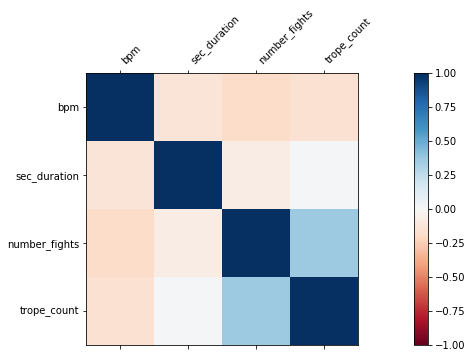

In [12]:
labels = ["bpm","sec_duration", "number_fights", "trope_count"]

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111) # series of 3D subplots
cax = ax.matshow(correlations, vmin = -1, vmax = 1, cmap = 'RdBu')
fig.colorbar(cax)
ticks = np.arange(0,4,1) # series of tick marks corresponding to 8 independent variables 0-7
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(labels, rotation=45, ha="left") # making it look pretty because long label names
ax.set_yticklabels(labels)

plt.show()

We see a positive correlation between the number of fights a song has and the number of tropes!
### Data Analysis

We'll need to import scikit to get our support vector classifier, our preprocessing data scaler, and our GridSearch Classifier to choose the best parameters. As mentioned before, we'll use the SVC to see if we can predict what conference a song belongs in based on the other features. Seeing as SVMs only support binary classification, we'll try to see if we can find whether or not a song is from an ACC school

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

We'll have to clear some features that unfortuantely do not work with the SVM

In [14]:
svm_data = data.drop(["school", "song_name"], axis = 1)
svm_data = svm_data.replace("Unknown", np.nan)
dummies = pd.get_dummies(svm_data, drop_first = False)
dummies

bpm  sec_duration  number_fights  trope_count  conference_ACC  \
0   152            64              1            6               0   
1    76            99              4            5               0   
2   155            55              5            4               0   
3   137            62              0            3               0   
4    80            67              6            3               0   
5   153            37              0            2               0   
6   180            29              5            4               0   
7    81            65             17            4               0   
8   149            47              2            6               0   
9   159            54              8            3               0   
10  152            92              0            1               0   
11  162            60              0            6               0   
12  150            63              1            3               0   
13  150            72              9            3               0   
14  142            56              8            3               0   
15   83           122              0            0               0   
16  145           112              6            5               0   
17  151            60              0            3               0   
18  136            94              0            1               0   
19  140            57              1            4               0   
20  178            89              1            5               0   
21  145            81              5            5               0   
22  160            86              0            2               0   
23   75            74             10            8               0   
24  132           134              5            3               0   
25  144            83              0            1               0   
26  150           106              3            4               0   
27  134            88              2            5               0   
28  151            27              8            4               0   
29   65            80              2            5               0   
..  ...           ...            ...          ...             ...   
35  139            89              1            4               0   
36   81            64              7            5               0   
37  153            59              3            6               0   
38   77            88              3            3               0   
39   77            27              1            4               0   
40   71            66              1            2               0   
41  162            41              0            1               0   
42   79            52              4            5               0   
43  168            83              5            5               0   
44  153            65              6            4               0   
45  146            54              2            4               0   
46  138            86              4            3               0   
47  153            64              4            4               0   
48  149            53              0            0               0   
49  117           172              1            4               0   
50   72            45              3            3               0   
51  147            84              0            0               1   
52  145            78              0            1               1   
53  139            58              5            4               1   
54  135            92              6            5               1   
55  148            68              0            3               1   
56  139            80              3            5               1   
57   75            73              3            3               1   
58  158            38              0            1               1   
59   90            82              0            3               1   
60   79           110              0            6               1   
61

In [15]:
DV = 'conference_ACC'
X = dummies.drop([DV, "conference_SEC", "conference_Pac-12", "conference_Big Ten", "conference_Big 12"], axis=1)
y = dummies[DV]

Split our data into testing and training sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

Scale our data accordingly using z-scores

In [17]:
model = StandardScaler()

X_train_scaled = model.fit_transform(X_train)
x_test_scaled = model.transform(X_test)

Now let's see what hyperparameters are best for us to use here using the grid search

In [18]:
grid = {'C': np.linspace(1, 10, 10), 'kernel': ['linear', 'poly', 'sigmoid']}
model = GridSearchCV(SVC(gamma='auto'), grid, scoring='f1', cv=5)

In [19]:
model.fit(X_train_scaled, y_train)

C:\Users\Maxim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\Maxim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\Maxim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\Maxim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\Maxim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\Maxim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefin

C:\Users\Maxim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
                         'kernel': ['linear', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

I ran into some issues here because I am not sure why the grid search is unable to calculate an F score from my matrix. My guess is that there are missing values but I do not know where

In [20]:
# Predicted Class
predicted_class = model.predict(X_test)

# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted_class))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No              0             14     14
Actual Yes             0              3      3
Total                  0             17     17


The confusion matrix tells us the model only accurately predicted two of the songs to be in the ACC conference. I would want to re-examine this with a correctly operating model

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.18      1.00      0.30         3

    accuracy                           0.18        17
   macro avg       0.09      0.50      0.15        17
weighted avg       0.03      0.18      0.05        17



C:\Users\Maxim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



The classification report tells me that the accuracy was 24%. To visualize this we can use a quick bar chart

In [22]:
actuals=["No", "Yes"]

fig = go.Figure(data=[
    go.Bar(name='Predicted', x=actuals, y=[2, 0]),
    go.Bar(name='Actual', x=actuals, y=[13, 2])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In this chart, blue represents the accurate predictions while red represents the false ones.